<a href="https://colab.research.google.com/github/britt-klose/GenAI-HW2/blob/main/HW2FinalCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brittany Klose GENAI HW-2

**Part 1:** **Data** **Preprocessing**

* Load the CIFAR-10 dataset using the appropriate function from tf.keras.datasets.

* Normalize the images by dividing by 255.0.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils, datasets

In [2]:
#@title Parameters
NUM_CLASSES = 10

In [3]:
#@title Prepare the Data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

**Part 3:** **CNN Model** (Using Strides)

* Declare the function: **def create_cnn_model(input_shape)**
*  Have the function create a **CNN model** using **Sequential** and add layers using **Conv2D, BatchNormalization, ReLU, Flatten, Dense, and Dropout** from *tf.keras.layers*. Use strides to reduce spatial dimensions.
* **Compile the CNN Model** with an optimizer and loss function (adam and sparse_categorical_crossentropy).
* Train the CNN model using the fit method and include validation split.

**Part 4:** **Evaluation**

* Evaluate both models on the test set using the *evaluate* method.

**Part 5:** **Plotting Results**

* **Plot the validation accuracy** for both models using *matplotlib.pyplot.*
* **Plot the training accuracy** for both models using *matplotlib.pyplot.*

In [14]:
#@title Building The Model

#3.
def create_cnn_model():

  # Using Sequential model
   model = models.Sequential()
        # First COV2D layer
   model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", input_shape=(32, 32, 3)))
   model.add(layers.BatchNormalization())
   model.add(layers.LeakyReLU())

   #######################################################################
   # Second COV2D layer: Output shape- (16, 16, 32)
   #     32 filters, 3x3 kernel size, stride of 2, and same padding.
   #     With a stride of 2, the filter moves 2 pixels at a time, effectively
   #     halving the spatial dimensions of the input.

   model.add(layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same"))
   model.add(layers.BatchNormalization())
   model.add(layers.LeakyReLU())

  #######################################################################
  # Third COV2D layer: Output shape- (16, 16, 64)
  #      64 filters, 3x3 kernel size, stride of 1, and same padding.
  #      The spatial dimensions remain the same, but the depth increases to 64.

   model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
   model.add(layers.BatchNormalization())
   model.add(layers.LeakyReLU())

  # Fourth Conv2D layer
   model.add(layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same"))
   model.add(layers.BatchNormalization())
   model.add(layers.LeakyReLU())

  # Flatten layer
   model.add(layers.Flatten())

  # Fully connected layer
   model.add(layers.Dense(128))
   model.add(layers.BatchNormalization())
   model.add(layers.LeakyReLU())
   model.add(layers.Dropout(rate=0.5))

  # Output layer
   model.add(layers.Dense(NUM_CLASSES))
   model.add(layers.Activation("softmax"))

  # Summary of the model
   model.summary()

    #4.Training CNN Model
   opt = optimizers.Adam(learning_rate=0.0005)
   model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
   )


   model.fit(
        x_train,
        y_train,
        batch_size=32,
        epochs=10,
        shuffle=True,
        validation_data=(x_test, y_test),
)

   #5Evaluate Model
   model.evaluate(x_test, y_test, batch_size=1000)

   CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

   preds = model.predict(x_test)
   preds_single = CLASSES[np.argmax(preds, axis=-1)]
   actual_single = CLASSES[np.argmax(y_test, axis=-1)]

#6. Plot model
   n_to_show = 10
   indices = np.random.choice(range(len(x_test)), n_to_show)

   fig = plt.figure(figsize=(15, 3))
   fig.subplots_adjust(hspace=0.4, wspace=0.4)

   for i, idx in enumerate(indices):
      img = x_test[idx]
      ax = fig.add_subplot(1, n_to_show, i + 1)
      ax.axis("off")
      ax.text(
          0.5,
          -0.35,
          "pred = " + str(preds_single[idx]),
          fontsize=10,
          ha="center",
          transform=ax.transAxes,
      )
      ax.text(
          0.5,
          -0.7,
          "act = " + str(actual_single[idx]),
          fontsize=10,
          ha="center",
          transform=ax.transAxes,
      )
      ax.imshow(img)#@title Plotting CNN Results

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │              

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3873 - loss: 1.8028 - val_accuracy: 0.5872 - val_loss: 1.1656
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5853 - loss: 1.1768 - val_accuracy: 0.6313 - val_loss: 1.0480
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6439 - loss: 1.0180 - val_accuracy: 0.4843 - val_loss: 1.6092
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6785 - loss: 0.9214 - val_accuracy: 0.6835 - val_loss: 0.9051
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7069 - loss: 0.8412 - val_accuracy: 0.6788 - val_loss: 0.9181
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7253 - loss: 0.7927 - val_accuracy: 0.6898 - val_loss: 0.9024
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7383 - loss: 0.7518 - val_accuracy: 0.7163 - val_loss: 0.8168
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7507 - loss: 0.7

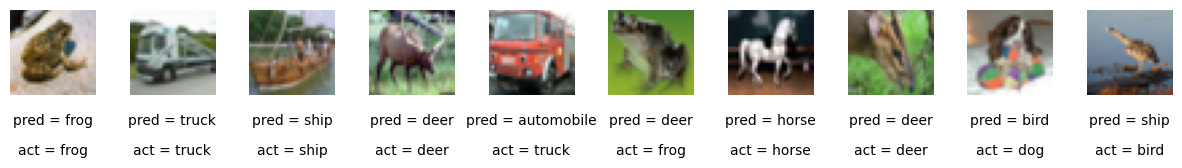

In [15]:
create_cnn_model()